In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

import os

In [144]:
# Path to the CSV file
current_directory = os.getcwd()
file_path = os.path.join(current_directory, "archives", "PDMX.csv")
df = pd.read_csv(file_path)

Having loaded the CSV, we perform a little analysis of the dataset.

In [145]:
df.head()

,path,metadata,mxl,pdf,version,is_user_pro,is_user_publisher,is_user_staff,has_paywall,is_rated,...,best_arrangement,is_best_arrangement,best_unique_arrangement,is_best_unique_arrangement,subset:all,subset:rated,subset:deduplicated,subset:rated_deduplicated,subset:no_license_conflict,subset:valid_mxl_pdf
0,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,./metadata/5/5740212.json,./mxl/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,./pdf/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,3.01,True,False,False,False,True,...,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,./data/1/11/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbH...,True,True,True,True,True,False,True
1,./data/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZK...,./metadata/2/5736259.json,./mxl/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,./pdf/1/11/QmbbWCwo3rhaJ2wKL6H7aQPX9D6HfQxLZKP...,3.01,True,False,False,False,False,...,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,./data/4/20/QmeFmHKn3UF4o56vThLV4kwXhpTNDd9gH9...,False,True,False,False,False,False,True
2,./data/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZP...,./metadata/1/4571401.json,./mxl/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZPJ...,./pdf/1/11/QmbbhLwwmuKqA9MC1ULhojEMGxnxDobsZPJ...,3.01,True,False,False,False,False,...,./data/0/9/QmaahMHX51JmiE3LZUbdFpvTTuMdiV8Uvmv...,False,./data/0/9/QmaahMHX51JmiE3LZUbdFpvTTuMdiV8Uvmv...,False,True,False,False,False,True,True
3,./data/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz...,./metadata/6/4694088.json,./mxl/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz6...,./pdf/1/11/Qmbbh58jD1ZLT1vevNsnyEZkexnx2USTFz6...,3.01,True,False,False,False,False,...,./data/13/1/QmV2RMMZuHxhgQqEUV98FpFGJ5mPuDVSXy...,False,./data/13/1/QmV2RMMZuHxhgQqEUV98FpFGJ5mPuDVSXy...,False,True,False,False,False,True,True
4,./data/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysS...,./metadata/4/4808199.json,./mxl/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysSQ...,./pdf/1/11/Qmbbmnu3Eg81nQ3WHnBFrAj5gsr3D13ysSQ...,3.01,True,False,False,False,False,...,./data/5/4/Qmf5QQhwvkXMmNtjG8ydfNRFq5yBDvhQbfQ...,False,./data/5/4/Qmf5QQhwvkXMmNtjG8ydfNRFq5yBDvhQbfQ...,False,True,False,False,False,True,True


In [146]:
df.columns

Index(['path', 'metadata', 'mxl', 'pdf', 'version', 'is_user_pro',
       'is_user_publisher', 'is_user_staff', 'has_paywall', 'is_rated',
       'is_official', 'is_original', 'is_draft', 'has_custom_audio',
       'has_custom_video', 'n_comments', 'n_favorites', 'n_views', 'n_ratings',
       'rating', 'license', 'license_url', 'license_conflict', 'genres',
       'groups', 'tags', 'song_name', 'title', 'subtitle', 'artist_name',
       'composer_name', 'publisher', 'complexity', 'n_tracks', 'tracks',
       'song_length', 'song_length.seconds', 'song_length.bars',
       'song_length.beats', 'n_notes', 'notes_per_bar', 'n_annotations',
       'has_annotations', 'n_lyrics', 'has_lyrics', 'n_tokens',
       'pitch_class_entropy', 'scale_consistency', 'groove_consistency',
       'best_path', 'is_best_path', 'best_arrangement', 'is_best_arrangement',
       'best_unique_arrangement', 'is_best_unique_arrangement', 'subset:all',
       'subset:rated', 'subset:deduplicated', 'subset:rated_

In [147]:
n_songs = len(df)
n_unlabeled = df['genres'].isnull().sum()

print("Number of songs in the dataset: ", n_songs)
print("Number of songs without genre: ",  n_unlabeled)
print("Number of labelled songs: ",  n_songs - n_unlabeled)

Number of songs in the dataset:  254077
Number of songs without genre:  171276
Number of labelled songs:  82801


We now count and visualise the distribution of genres in the dataset.

             Genre   Count
1              nan  171276
0        classical   64586
3             folk   11076
5       soundtrack    3461
4             rock    1668
7              pop    1544
8             jazz     647
12      electronic     581
11      rbfunksoul     494
2   religiousmusic     460
6       worldmusic     337
10          hiphop     220
16           metal     149
9     experimental     126
15         country     122
14          newage      59
17          comedy      43
13           disco      39
19       reggaeska      18
18           blues      16
20        darkwave       3


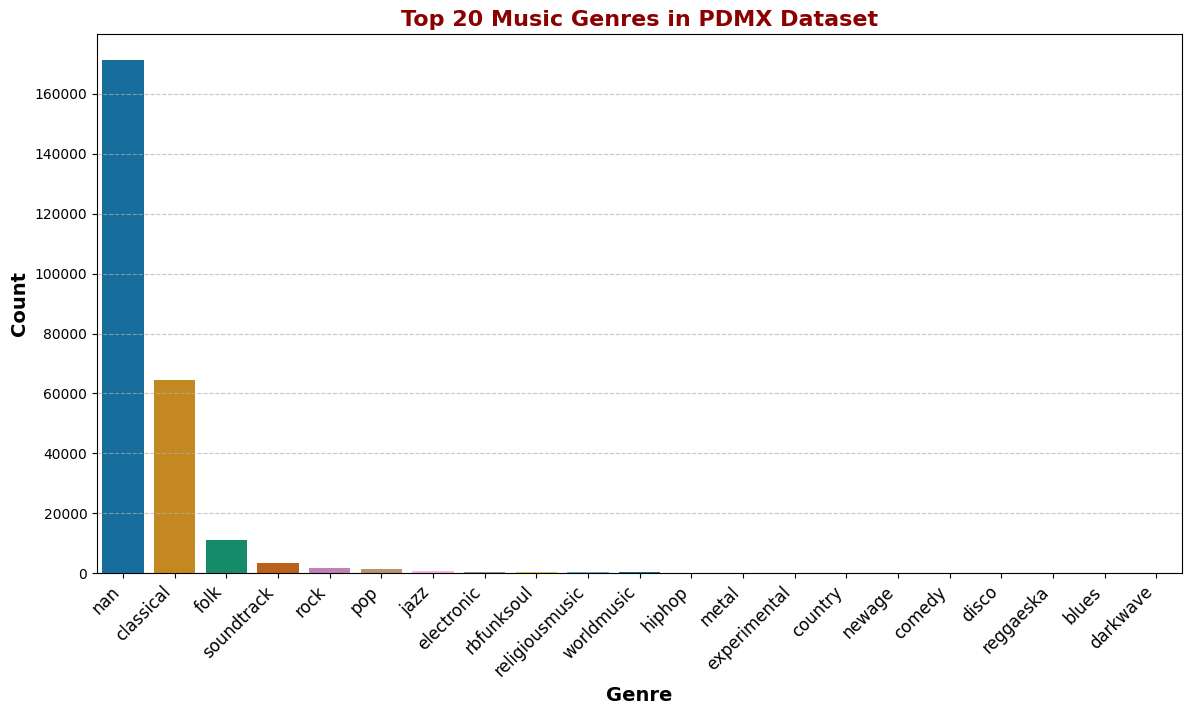

In [148]:
# We convert genres to string and split for multi-label instances
df['genres'] = df['genres'].astype(str)  
genre_series = df['genres'].str.split('-')  

# Flatten the list of genres and count occurrences
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)

# DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genre_df)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_df['Genre'][:21], y=genre_df['Count'][:21], hue=genre_df['Genre'][:21], legend="auto", palette="colorblind")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Genre", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Top 20 Music Genres in PDMX Dataset", fontsize=16, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Some rows (songs) have multiple genres associated to them, we count how many intances of those happen.

In [149]:
# We count multi-label instances (songs with more than one genre)
multi_label_instances = sum(1 for genres in genre_series if len(genres) > 1)
print(f"Number of multi-label instances (songs with multiple genres): {multi_label_instances}")

Number of multi-label instances (songs with multiple genres): 2727


In [150]:
# We convert any non-standard NaN representations to actual NaN
df['genres'] = df['genres'].replace(['nan', 'NaN', 'None', ''], np.nan)
df['pdf'] = df['pdf'].replace(['nan', 'NaN', 'None', ''], np.nan)

df = df.dropna(subset=['genres'])
df = df.dropna(subset=['pdf'])
df = df.dropna(subset=['mxl'])

After the removal of Nan entries we plot the resulting distribution, log transformed in the y axis for better visualisation, due to the hihg class imbalance.

In [151]:
df['genres'] = df['genres'].astype(str)  
df['genres'] = df['genres'].str.split('-')  # Again, convert multi-label genres into lists

# Genre mapping for new targets
genre_map = {
    "classical": "Classical",
    "folk": "Folk/World",
    "worldmusic": "Folk/World",
    "rock": "Rock & Metal",
    "metal": "Rock & Metal",
    "pop": "Pop",
    "jazz": "Jazz & Blues",
    "blues": "Jazz & Blues",
    "electronic": "Electronic & Dance",
    "disco": "Electronic & Dance",
    "newage": "Electronic & Dance",
    "rbfunksoul": "R&B, Soul & Hip-Hop",
    "hiphop": "R&B, Soul & Hip-Hop",
    "soundtrack": "Soundtrack",
    "religiousmusic": "Religious",
    "experimental": "Experimental",
    "darkwave": "Experimental",
    "comedy": "Experimental",
    "reggaeska": "Reggae & Ska"
}

# Function to remap genres
def map_genres(genre_list):
    return list(set(genre_map.get(genre.strip(), genre) for genre in genre_list))

# Apply genre mapping
df['new_genres'] = df['genres'].apply(map_genres)

# Flatten list and count occurrences
all_new_genres = [genre for sublist in df['new_genres'] for genre in sublist]
new_genre_counts = Counter(all_new_genres)

# New DataFrame for visualization
new_genre_df = pd.DataFrame(new_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# New genre distribution
print(new_genre_df)


                  Genre  Count
0             Classical  64573
2            Folk/World  11385
4            Soundtrack   3461
3          Rock & Metal   1774
5                   Pop   1544
8   R&B, Soul & Hip-Hop    683
9    Electronic & Dance    670
6          Jazz & Blues    662
1             Religious    460
7          Experimental    172
10              country    122
11         Reggae & Ska     18


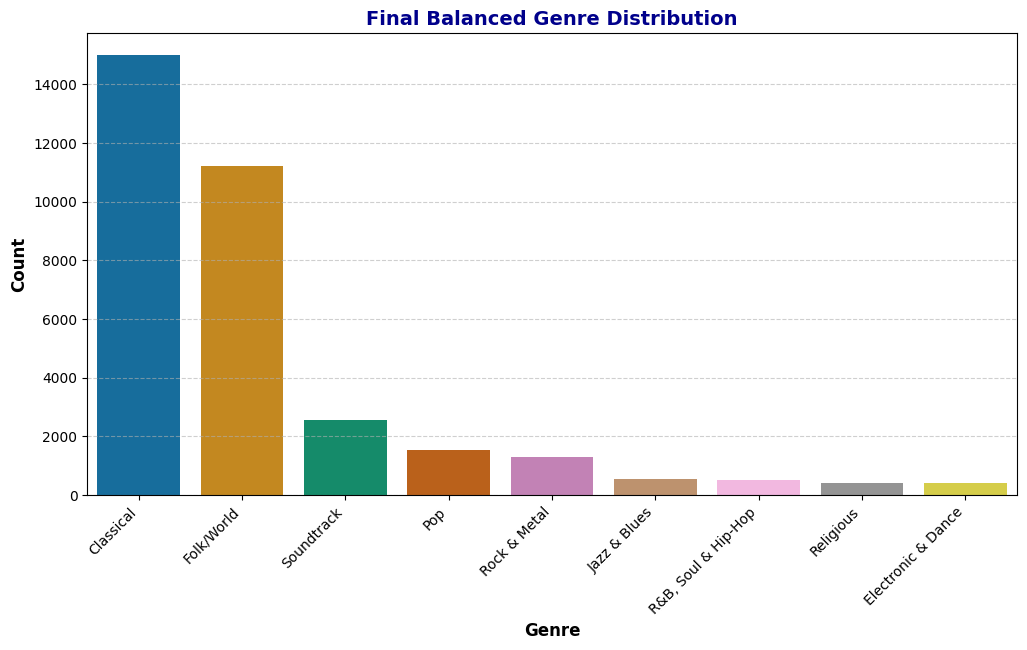

                 Genre  Count
0            Classical  15000
2           Folk/World  11223
8           Soundtrack   2558
4                  Pop   1543
7         Rock & Metal   1284
3         Jazz & Blues    540
5  R&B, Soul & Hip-Hop    499
6            Religious    420
1   Electronic & Dance    401
Final dataset shape: (33468, 63)


In [152]:
# Here we choose the primary genre for each song to avoid multiple classes per instance
df['primary_genre'] = df['new_genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Threshold for undersampling and pruning
max_count = 15000  # Classical gets undersampled
min_count = 400

all_new_genres = [genre for sublist in df['new_genres'] for genre in sublist]
new_genre_counts = Counter(all_new_genres)

# Count occurrences
final_genre_counts = Counter(df['primary_genre'])

# We filter out songs with rare genres (less than min_count)
df_filtered = df.loc[df['primary_genre'].map(final_genre_counts.get).ge(min_count)].copy()

# Split into features and labels
X = df_filtered.drop(columns=['primary_genre'])
y = df_filtered['primary_genre']

# Apply undersampling for Classical
under_sampler = RandomUnderSampler(sampling_strategy={"Classical": max_count}, random_state=42)
X_balanced, y_balanced = under_sampler.fit_resample(X, y)

# Final balanced DataFrame
df_balanced = pd.DataFrame(X_balanced)
df_balanced['primary_genre'] = y_balanced

# Count occurrences of the final genres
balanced_genre_counts = Counter(y_balanced)
balanced_genre_df = pd.DataFrame(balanced_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=balanced_genre_df, x="Genre", y="Count", hue="Genre", palette="colorblind")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Genre", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Final Balanced Genre Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Final dataset shape
print(balanced_genre_df)
print(f"Final dataset shape: {df_balanced.shape}")

In [153]:
df_balanced.head()

,path,metadata,mxl,pdf,version,is_user_pro,is_user_publisher,is_user_staff,has_paywall,is_rated,...,best_unique_arrangement,is_best_unique_arrangement,subset:all,subset:rated,subset:deduplicated,subset:rated_deduplicated,subset:no_license_conflict,subset:valid_mxl_pdf,new_genres,primary_genre
162623,./data/8/30/QmQLGCUHZPjirsTFkbZwPxiMuQUu1h1qmS...,./metadata/4/5750841.json,./mxl/8/30/QmQLGCUHZPjirsTFkbZwPxiMuQUu1h1qmSc...,./pdf/8/30/QmQLGCUHZPjirsTFkbZwPxiMuQUu1h1qmSc...,3.01,True,False,False,False,False,...,./data/8/30/QmQLGCUHZPjirsTFkbZwPxiMuQUu1h1qmS...,True,True,False,True,False,True,True,[Classical],Classical
156015,./data/0/8/Qma9tx6nzTNGkKjD343NvexMVmCpGdX2pVm...,./metadata/7/5771089.json,./mxl/0/8/Qma9tx6nzTNGkKjD343NvexMVmCpGdX2pVmP...,./pdf/0/8/Qma9tx6nzTNGkKjD343NvexMVmCpGdX2pVmP...,3.01,True,False,False,False,False,...,./data/0/8/Qma9tx6nzTNGkKjD343NvexMVmCpGdX2pVm...,True,True,False,True,False,True,True,[Classical],Classical
243179,./data/15/51/QmXW8ToB7ZwCFQUW9TgYbE34pcDrwB2Kr...,./metadata/7/5736366.json,./mxl/15/51/QmXW8ToB7ZwCFQUW9TgYbE34pcDrwB2Krs...,./pdf/15/51/QmXW8ToB7ZwCFQUW9TgYbE34pcDrwB2Krs...,3.01,True,False,False,False,False,...,./data/15/51/QmXW8ToB7ZwCFQUW9TgYbE34pcDrwB2Kr...,True,True,False,True,False,False,True,[Classical],Classical
245188,./data/15/24/QmXHKaAx8DhVk2nMAEYWcHLxoijUGPyDA...,./metadata/1/5809221.json,./mxl/15/24/QmXHKaAx8DhVk2nMAEYWcHLxoijUGPyDAe...,./pdf/15/24/QmXHKaAx8DhVk2nMAEYWcHLxoijUGPyDAe...,3.01,True,False,False,False,False,...,./data/15/24/QmXHKaAx8DhVk2nMAEYWcHLxoijUGPyDA...,True,True,False,True,False,False,True,[Classical],Classical
160263,./data/0/49/QmaVW8eBZs2eut3UnLsecQvz44nnEPaVNQ...,./metadata/7/5770688.json,./mxl/0/49/QmaVW8eBZs2eut3UnLsecQvz44nnEPaVNQA...,./pdf/0/49/QmaVW8eBZs2eut3UnLsecQvz44nnEPaVNQA...,3.01,True,False,False,False,False,...,./data/0/49/QmaVW8eBZs2eut3UnLsecQvz44nnEPaVNQ...,True,True,False,True,False,True,True,[Classical],Classical


Save CSV without nans for correct manipulation of the files.

In [154]:
df_balanced.to_csv('dataset.csv', index=False)  # Set index=False to avoid saving the index column

print("CSV file saved successfully!")

CSV file saved successfully!


In [155]:
### subset:valid_mxl_pdf, the songs has both pdff and mxl associated